# IRIS' PORTFOLIO


## DATA IMPORT

In [5]:
#UFC Fight Prediction Project 

In [1]:
import pandas as pd

In [3]:
# Load the dataset
data = pd.read_csv('data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [8]:
# Display the first few rows of the dataframe
print(data.head())

       R_fighter          B_fighter        Referee        date  \
0   Adrian Yanez      Gustavo Lopez  Chris Tognoni  2021-03-20   
1   Trevin Giles      Roman Dolidze      Herb Dean  2021-03-20   
2    Tai Tuivasa    Harry Hunsucker      Herb Dean  2021-03-20   
3  Cheyanne Buys  Montserrat Conejo     Mark Smith  2021-03-20   
4  Marion Reneau      Macy Chiasson     Mark Smith  2021-03-20   

                 location Winner  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   
1  Las Vegas, Nevada, USA    Red       False       Middleweight     0.500   
2  Las Vegas, Nevada, USA    Red       False        Heavyweight       NaN   
3  Las Vegas, Nevada, USA   Blue       False   WomenStrawweight       NaN   
4  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight     0.125   

   B_avg_opp_KD  ...  R_win_by_Decision_Unanimous  R_win_by_KO/TKO  \
0           0.0  ...                            0                1   


In [9]:
# Summary statistics for numerical features
print(data.describe())

          B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  \
count  4585.000000   4585.000000        4585.000000            4585.000000   
mean      0.247476      0.176818           0.453310               0.434290   
std       0.378509      0.324633           0.130458               0.132618   
min       0.000000      0.000000           0.000000               0.000000   
25%       0.000000      0.000000           0.376489               0.351045   
50%       0.015625      0.000000           0.450000               0.427500   
75%       0.500000      0.250000           0.527500               0.510000   
max       5.000000      3.000000           1.000000               1.000000   

       B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  \
count   4585.000000       4585.000000    4585.000000        4585.000000   
mean       0.292650          0.268742       0.478884           0.409276   
std        0.273628          0.267178       0.724229           0.653826 

In [10]:
# Count the number of missing values in each column
print(data.isnull().sum())

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [11]:
# Explore the distribution of the target variable
print(data['Winner'].value_counts())

Winner
Red     3979
Blue    1923
Draw     110
Name: count, dtype: int64


In [12]:
# check pre-processed data
#has 160 columns, indicating additional features or one-hot encoded variables, particularly evident in stance types (e.g., B_Stance_Orthodox, R_Stance_Switch)
pre_data = pd.read_csv('preprocessed_data.csv')


In [13]:
# Display the first few rows

print(pre_data.head())

  Winner  title_bout  B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  \
0    Red       False  0.000000           0.0           0.420000   
1    Red       False  0.500000           0.0           0.660000   
2    Red       False  0.015625           0.0           0.450000   
3   Blue       False  0.015625           0.0           0.450000   
4   Blue       False  0.125000           0.0           0.535625   

   B_avg_opp_SIG_STR_pct  B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  \
0                0.49500         0.330           0.36000       0.500000   
1                0.30500         0.300           0.50000       1.500000   
2                0.42750         0.250           0.20000       0.148468   
3                0.42750         0.250           0.20000       0.148468   
4                0.57875         0.185           0.16625       0.125000   

   B_avg_opp_SUB_ATT  ...  B_Stance_Open Stance  B_Stance_Orthodox  \
0           1.000000  ...                     0                  1   
1     

In [14]:
# Check for missing values
print(pre_data.isnull().sum())

Winner                  0
title_bout              0
B_avg_KD                0
B_avg_opp_KD            0
B_avg_SIG_STR_pct       0
                       ..
R_Stance_Open Stance    0
R_Stance_Orthodox       0
R_Stance_Sideways       0
R_Stance_Southpaw       0
R_Stance_Switch         0
Length: 160, dtype: int64


In [15]:
# Describe the data to see statistical summaries
print(pre_data.describe())

          B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  \
count  5902.000000   5902.000000        5902.000000            5902.000000   
mean      0.193739      0.135246           0.452788               0.432788   
std       0.346475      0.294238           0.114325               0.116189   
min       0.000000      0.000000           0.000000               0.000000   
25%       0.000000      0.000000           0.401611               0.376250   
50%       0.015625      0.000000           0.450000               0.427500   
75%       0.250000      0.093750           0.500000               0.480000   
max       5.000000      3.000000           1.000000               1.000000   

       B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  \
count   5902.000000       5902.000000    5902.000000        5902.000000   
mean       0.282610          0.252897       0.400956           0.335873   
std        0.239811          0.235253       0.648117           0.586483 

In [16]:
#dataset has been cleaned to some extent, which is crucial for maintaining the quality of machine learning model predictions

## DATA EXPLORATION

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [18]:
#Fight Outcome Prediction
#Predict the Winner: Use machine learning models to predict the outcome of fights based on fighters' historical performance, physical attributes, and match conditions. 
#Winning Method Prediction: Predict not just who will win, but how they will win (e.g., KO/TKO, Submission, Decision).

## use cases

In [19]:
#1. Fighter Performance Analysis
#Win/Loss Analysis: Explore the win-loss records of fighters to identify patterns or factors contributing to success or failure.
#Career Longevity: Analyze the career spans of fighters, including debut, peak performance periods, and retirement stages.

In [20]:
#2. Match Outcome Predictions
#Technique and Strategy: Explore the impact of fighting techniques (e.g., grappling vs. striking)
# on fight outcomes. This can include analysis of significant strikes, takedowns, and submissions.

In [21]:
#3. Event Analysis
#Event Popularity and Success: Analyze events based on location, number of fights, attendance, and viewer ratings 
#Fight of the Night: Identify characteristics of fights that win awards like 'Fight of the Night' 

In [22]:
#4. Historical Trends
#Evolution of the Sport: 
#Prevalence of Injury: Study injury reports related to different fighting styles or moves 

In [23]:
#5. Predictive Modeling for Betting Markets
#Odds Analysis: Compare pre-fight betting odds 

In [24]:
#6. Fighter Training and Preparation
#Training Impact: If data on training camps or preparation durations is available
#Recovery Times: Look at times between fights and performance 

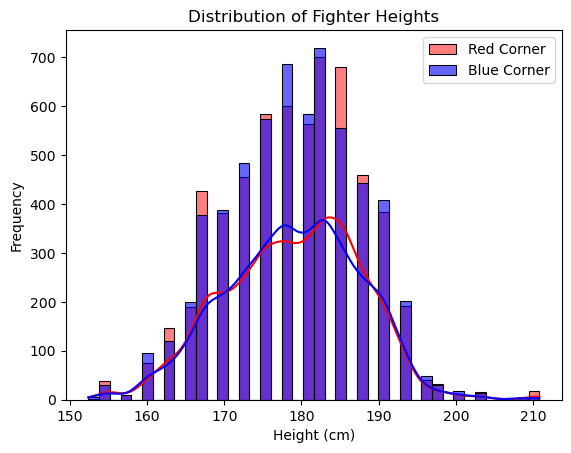

In [25]:
# Visualization of fighter heights
sns.histplot(data['R_Height_cms'], kde=True, color='red', label='Red Corner')
sns.histplot(data['B_Height_cms'], kde=True, color='blue', label='Blue Corner', alpha=0.6)
plt.title('Distribution of Fighter Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

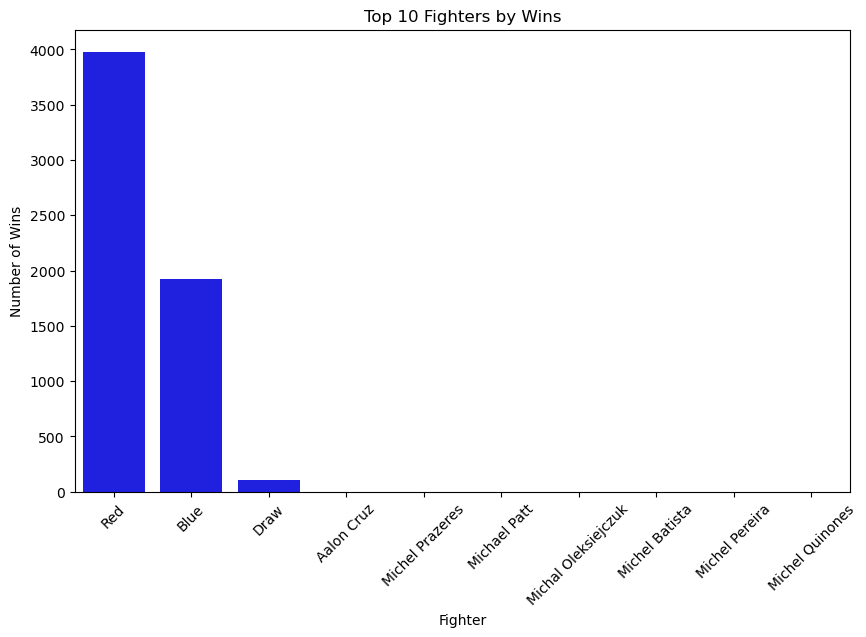

In [27]:
# Win/Loss Calculation
data['Loser'] = data.apply(lambda x: x['R_fighter'] if x['Winner'] == 'B_fighter' else x['B_fighter'], axis=1)
win_counts = data['Winner'].value_counts()
loss_counts = data['Loser'].value_counts()

# Combine win and loss data
fighter_stats = pd.DataFrame({
    'Wins': win_counts,
    'Losses': loss_counts
}).fillna(0)  # Fill NaN with 0 for fighters with all wins or losses

# Sort fighters by wins for visualization
fighter_stats = fighter_stats.sort_values(by='Wins', ascending=False)

# Plot top 10 fighters by wins
plt.figure(figsize=(10, 6))
sns.barplot(x=fighter_stats.head(10).index, y='Wins', data=fighter_stats.head(10), color='blue')
plt.xticks(rotation=45)
plt.title('Top 10 Fighters by Wins')
plt.ylabel('Number of Wins')
plt.xlabel('Fighter')
plt.show()


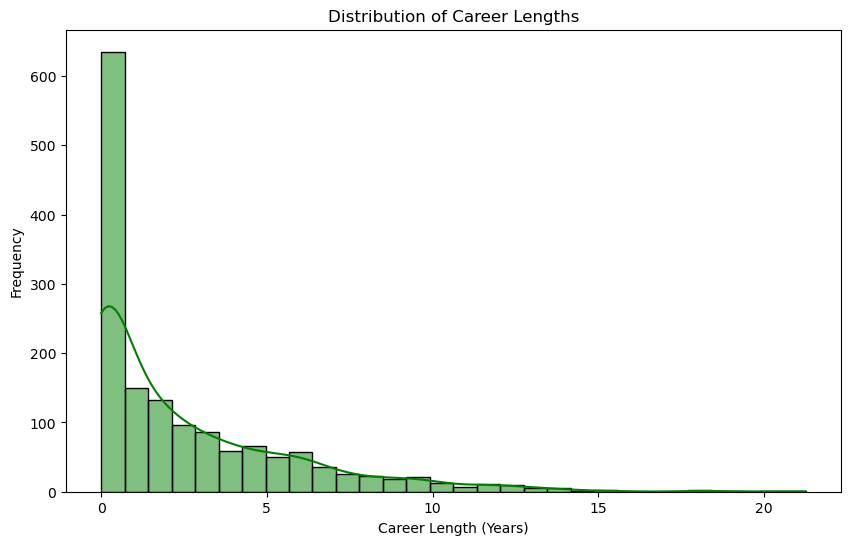

In [28]:
# Career Longevity Calculation
data['date'] = pd.to_datetime(data['date'])
career_start = data.groupby('R_fighter')['date'].min()
career_end = data.groupby('R_fighter')['date'].max()

# Calculate career length in years
career_length = (career_end - career_start).dt.days / 365.25

# Plot career lengths
plt.figure(figsize=(10, 6))
sns.histplot(career_length, bins=30, kde=True, color='green')
plt.title('Distribution of Career Lengths')
plt.xlabel('Career Length (Years)')
plt.ylabel('Frequency')
plt.show()

In [29]:
#Statistical test to see if differences are significant

# To further understand if the differences seen in the plots are statistically significant
#  perform statistical tests such as the t-test:


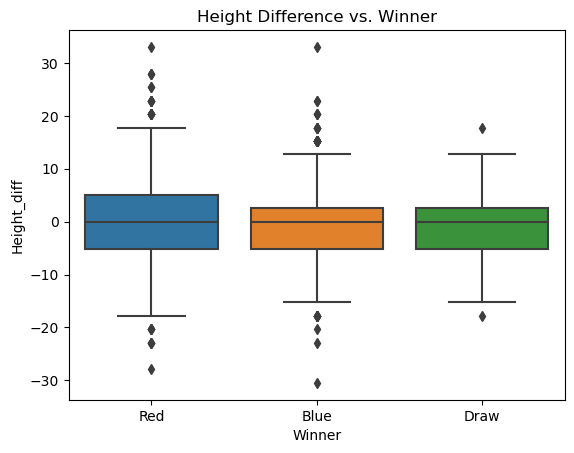

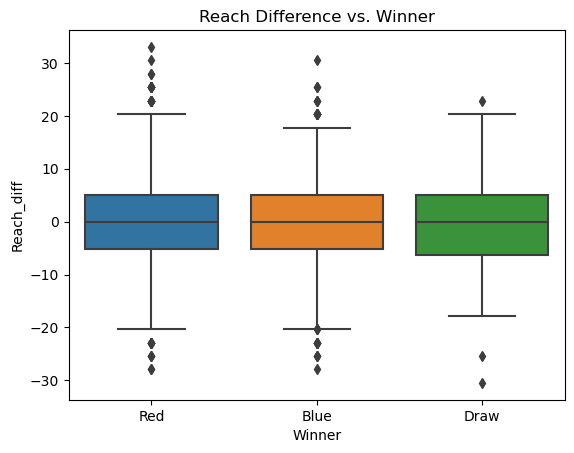

Height Difference Significance: TtestResult(statistic=nan, pvalue=nan, df=nan)
Reach Difference Significance: TtestResult(statistic=nan, pvalue=nan, df=nan)


In [30]:
#2 analyze physical attributes

# Calculate differences in physical attributes
data['Height_diff'] = data['R_Height_cms'] - data['B_Height_cms']
data['Reach_diff'] = data['R_Reach_cms'] - data['B_Reach_cms']
data['Weight_diff'] = data['R_Weight_lbs'] - data['B_Weight_lbs']

# Plot the differences in height and reach by winner
sns.boxplot(x='Winner', y='Height_diff', data=data)
plt.title('Height Difference vs. Winner')
plt.show()

sns.boxplot(x='Winner', y='Reach_diff', data=data)
plt.title('Reach Difference vs. Winner')
plt.show()

# use Statistical test 


red_wins = data[data['Winner'] == 'Red']
blue_wins = data[data['Winner'] == 'Blue']

print("Height Difference Significance:", ttest_ind(red_wins['Height_diff'], blue_wins['Height_diff']))
print("Reach Difference Significance:", ttest_ind(red_wins['Reach_diff'], blue_wins['Reach_diff']))


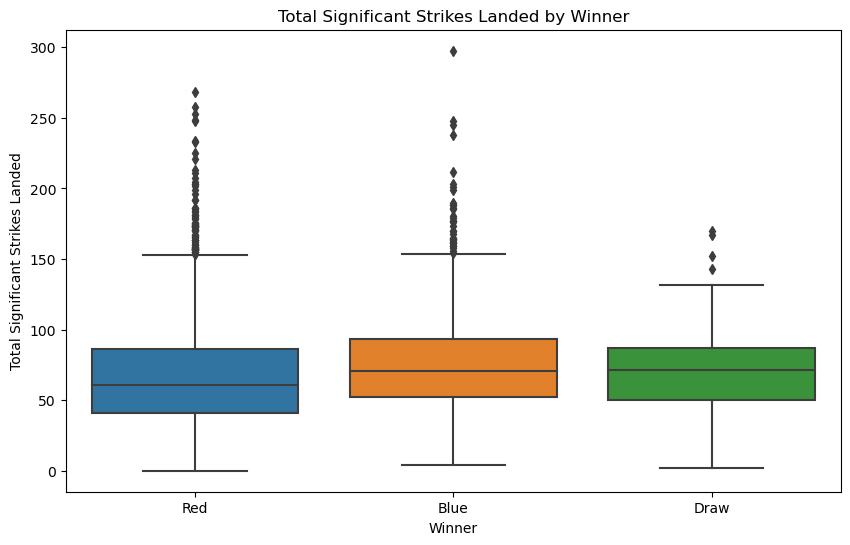

In [31]:
#2 Analyze Fighting Techniques and Strateg

# Calculate total significant strikes, total strikes, and takedowns for each fight
data['Total_SIG_STR_landed'] = data['R_avg_SIG_STR_landed'] + data['B_avg_SIG_STR_landed']
data['Total_TOTAL_STR_landed'] = data['R_avg_TOTAL_STR_landed'] + data['B_avg_TOTAL_STR_landed']
data['Total_TD_landed'] = data['R_avg_TD_landed'] + data['B_avg_TD_landed']

# Visualize the total significant strikes by winner
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winner', y='Total_SIG_STR_landed', data=data)
plt.title('Total Significant Strikes Landed by Winner')
plt.ylabel('Total Significant Strikes Landed')
plt.xlabel('Winner')
plt.show()



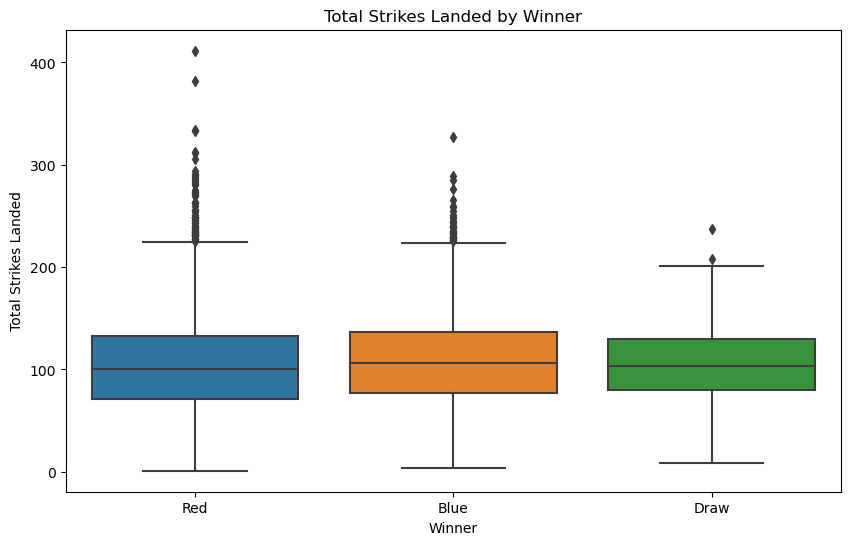

In [32]:
# Visualize the total strikes by winner
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winner', y='Total_TOTAL_STR_landed', data=data)
plt.title('Total Strikes Landed by Winner')
plt.ylabel('Total Strikes Landed')
plt.xlabel('Winner')
plt.show()



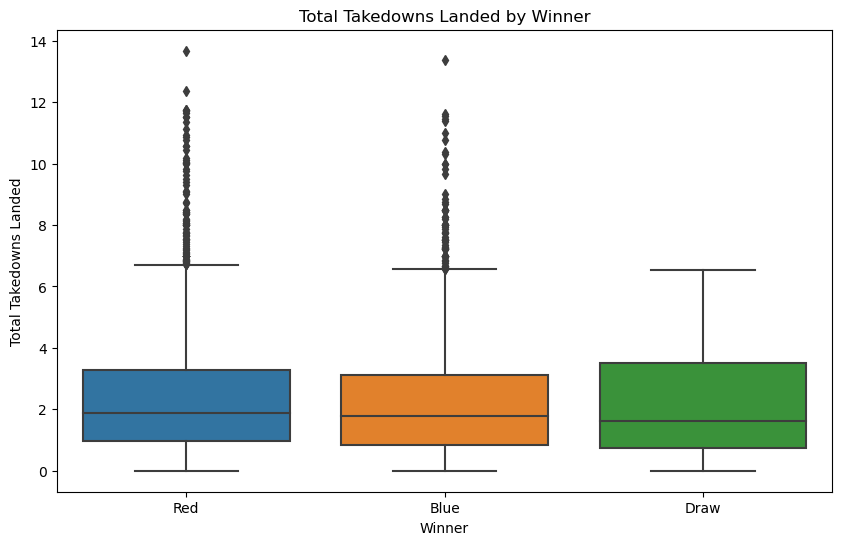

In [33]:
# Visualize the takedowns by winner
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winner', y='Total_TD_landed', data=data)
plt.title('Total Takedowns Landed by Winner')
plt.ylabel('Total Takedowns Landed')
plt.xlabel('Winner')
plt.show()

In [34]:


# Check for missing values in relevant columns
print(data[['Total_SIG_STR_landed', 'Total_TOTAL_STR_landed', 'Total_TD_landed']].isnull().sum())

# Option 1: Drop rows with missing values
data_clean = data.dropna(subset=['Total_SIG_STR_landed', 'Total_TOTAL_STR_landed', 'Total_TD_landed'])


Total_SIG_STR_landed      1696
Total_TOTAL_STR_landed    1696
Total_TD_landed           1696
dtype: int64


In [35]:
red_wins = data_clean[data_clean['Winner'] == 'Red']
blue_wins = data_clean[data_clean['Winner'] == 'Blue']

sig_str_ttest = ttest_ind(red_wins['Total_SIG_STR_landed'], blue_wins['Total_SIG_STR_landed'], nan_policy='omit')
total_str_ttest = ttest_ind(red_wins['Total_TOTAL_STR_landed'], blue_wins['Total_TOTAL_STR_landed'], nan_policy='omit')
td_ttest = ttest_ind(red_wins['Total_TD_landed'], blue_wins['Total_TD_landed'], nan_policy='omit')

print('Significant Strikes T-test:', sig_str_ttest)
print('Total Strikes T-test:', total_str_ttest)
print('Takedowns T-test:', td_ttest)

Significant Strikes T-test: TtestResult(statistic=-7.427707294081932, pvalue=1.3286917529464485e-13, df=4239.0)
Total Strikes T-test: TtestResult(statistic=-3.2060480619657454, pvalue=0.0013557099907400452, df=4239.0)
Takedowns T-test: TtestResult(statistic=1.058216010117232, pvalue=0.2900172710784814, df=4239.0)


In [36]:
# # Print all column names in the dataset
# print(pre_data.columns.tolist())


In [37]:
# 3Event Popularity and Success
# includes event-related data (like location, attendance, and ratings)



In [38]:
# # Print column names
# print("Data Columns:", data.columns.tolist())


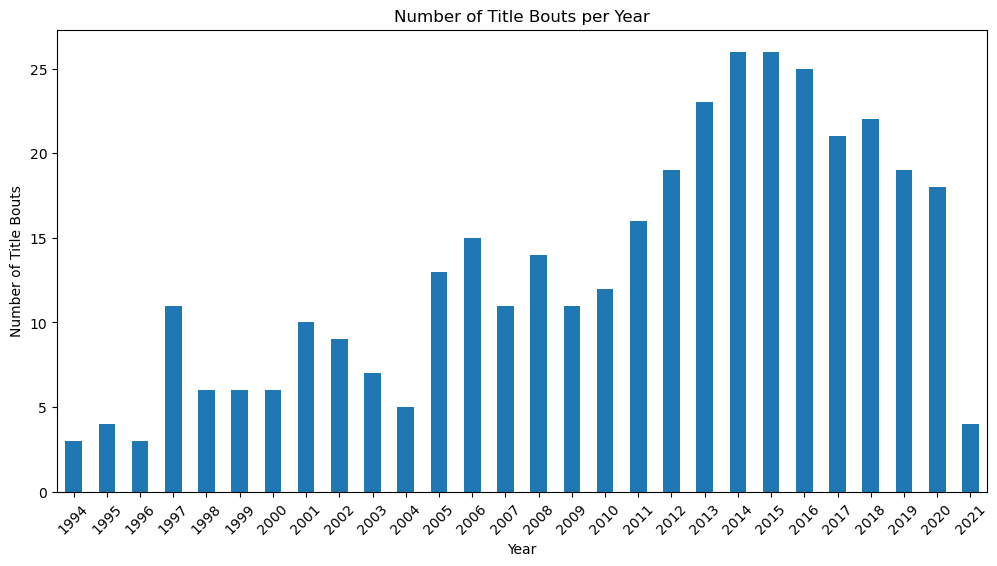

In [39]:
#  date column, used to analyze trends over time or seasonality, such as whether more title bouts happen at certain times of the year or if the frequency of fights has increased over the years.



# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create a year column for annual trend analysis
data['year'] = data['date'].dt.year

# Aggregate data by year to see the number of title bouts over time
title_bouts_per_year = data[data['title_bout'] == True].groupby('year').size()

# Plot the number of title bouts over time
plt.figure(figsize=(12, 6))
title_bouts_per_year.plot(kind='bar')
plt.title('Number of Title Bouts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Title Bouts')
plt.xticks(rotation=45)
plt.show()


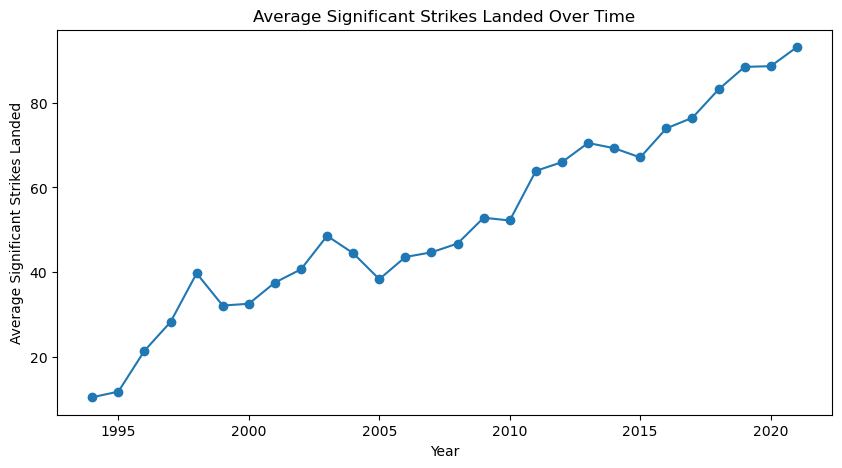

In [40]:
# exploring historical trends and insights can yield fascinating findings about the evolution of the sport
# 4a Trends in Fighting Styles
# investigate trends in fighting styles by analyzing changes in the frequency and success rates of different techniques over time

# Analyze changes in significant strikes over time
data['Total_SIG_STR'] = data['B_avg_SIG_STR_landed'] + data['R_avg_SIG_STR_landed']
data.groupby('year')['Total_SIG_STR'].mean().plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average Significant Strikes Landed Over Time')
plt.xlabel('Year')
plt.ylabel('Average Significant Strikes Landed')
plt.show()


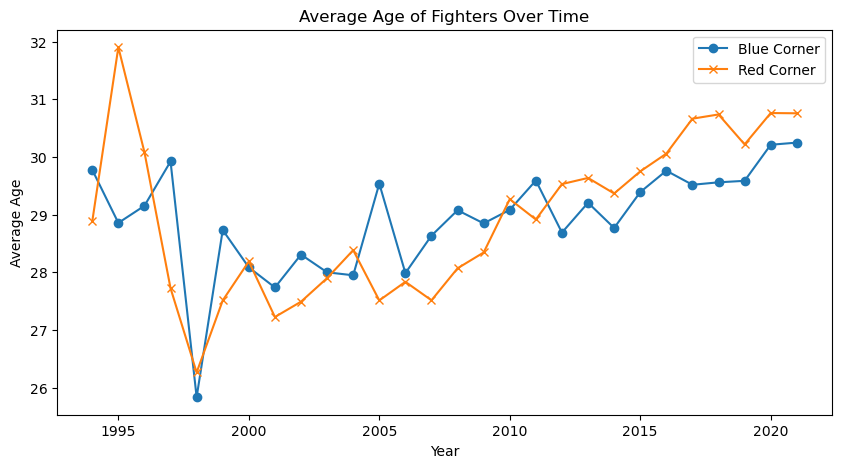

In [41]:
# #4b Fighter Demographics Trends
#  changes in the demographics of fighters, such as age distribution, reach, weight, and height over time

# Analyze the age distribution over time
data.groupby('year')['B_age'].mean().plot(kind='line', marker='o', label='Blue Corner', figsize=(10, 5))
data.groupby('year')['R_age'].mean().plot(kind='line', marker='x', label='Red Corner', figsize=(10, 5))
plt.title('Average Age of Fighters Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend()
plt.show()


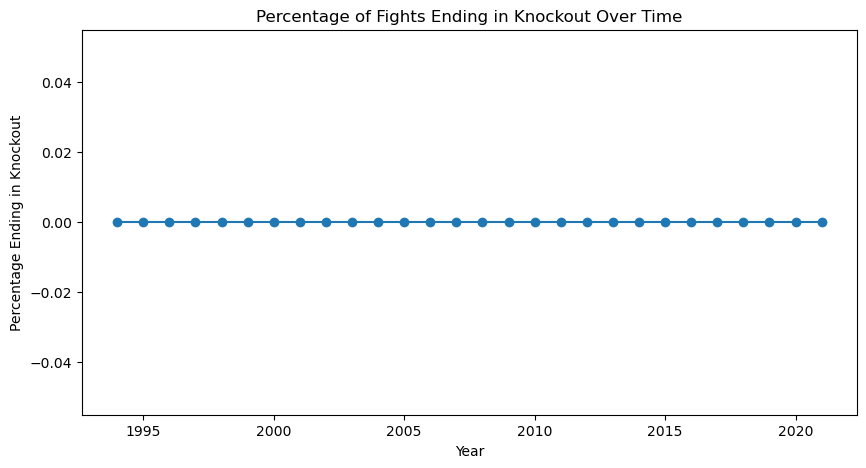

In [42]:
# 4b Fight Outcomes Over Time
# Examine how fight outcomes have changed over time, such as the proportion of fights ending in knockouts, submissions, or decisions

# Calculate the percentage of fights ending in a knockout
data['KO_victory'] = (data['Winner'] == 'KO/TKO').astype(int)
data.groupby('year')['KO_victory'].mean().plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Percentage of Fights Ending in Knockout Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage Ending in Knockout')
plt.show()


In [43]:
# # 4. Rule Changes and Their Impacts
# # need data on rule changes,  correlate these with changes in fight statistics to analyze their impact

#  need a timeline of when rule changes occurred and to then observe any statistical changes in the data around these times

## FEATURE ENGINEERING

In [45]:
print(pre_data.columns)

Index(['Winner', 'title_bout', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT',
       ...
       'B_Stance_Open Stance', 'B_Stance_Orthodox', 'B_Stance_Sideways',
       'B_Stance_Southpaw', 'B_Stance_Switch', 'R_Stance_Open Stance',
       'R_Stance_Orthodox', 'R_Stance_Sideways', 'R_Stance_Southpaw',
       'R_Stance_Switch'],
      dtype='object', length=160)


In [46]:
print(data.columns)

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'Height_diff', 'Reach_diff', 'Weight_diff', 'Total_SIG_STR_landed',
       'Total_TOTAL_STR_landed', 'Total_TD_landed', 'year', 'Total_SIG_STR',
       'KO_victory', 'Winner_is_Red'],
      dtype='object', length=155)


In [47]:

print(pre_data.columns)

# check for specific features by name to see if they already exist:
features_to_check = [
    'diff_avg_KD', 'diff_avg_SIG_STR', 'diff_avg_TD', 'ratio_avg_SIG_STR',
    'R_experience', 'B_experience', 'R_win_streak', 'B_win_streak',
    'age_difference', 'R_recent_win_rate', 'B_recent_win_rate',
    'weight_advantage', 'reach_advantage'
]

# Checking and printing whether each feature already exists in the DataFrame
for feature in features_to_check:
    exists = feature in pre_data.columns
    print(f"Feature '{feature}' exists: {exists}")


Index(['Winner', 'title_bout', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT',
       ...
       'B_Stance_Open Stance', 'B_Stance_Orthodox', 'B_Stance_Sideways',
       'B_Stance_Southpaw', 'B_Stance_Switch', 'R_Stance_Open Stance',
       'R_Stance_Orthodox', 'R_Stance_Sideways', 'R_Stance_Southpaw',
       'R_Stance_Switch'],
      dtype='object', length=160)
Feature 'diff_avg_KD' exists: False
Feature 'diff_avg_SIG_STR' exists: False
Feature 'diff_avg_TD' exists: False
Feature 'ratio_avg_SIG_STR' exists: False
Feature 'R_experience' exists: False
Feature 'B_experience' exists: False
Feature 'R_win_streak' exists: False
Feature 'B_win_streak' exists: False
Feature 'age_difference' exists: False
Feature 'R_recent_win_rate' exists: False
Feature 'B_recent_win_rate' exists: False
Feature 'weight_advantage' exists: False
Feature 'reach_advantage' exists: False


In [48]:
# feature engineering  for predicting fight outcomes

#1 Ratio of Average Significant Strikes:
pre_data['ratio_avg_SIG_STR'] = pre_data['R_avg_SIG_STR_landed'] / (pre_data['B_avg_SIG_STR_landed'] + 0.1)  
# Adding a small number to avoid division by zero

In [49]:
#2Experience and Win Streaks:

pre_data['R_experience'] = pre_data['R_total_rounds_fought']
pre_data['B_experience'] = pre_data['B_total_rounds_fought']
pre_data['R_win_streak'] = pre_data['R_current_win_streak']
pre_data['B_win_streak'] = pre_data['B_current_win_streak']

In [50]:
#3 Age Difference:

pre_data['age_difference'] = pre_data['R_age'] - pre_data['B_age']

In [51]:
#4 Physical Advantages:

pre_data['weight_advantage'] = pre_data['R_Weight_lbs'] - pre_data['B_Weight_lbs']
pre_data['reach_advantage'] = pre_data['R_Reach_cms'] - pre_data['B_Reach_cms']

In [52]:
#5 Calculating Recent Win Rate

# Convert 'Winner' into flags for each fighter
data['R_winner'] = (data['Winner'] == 'Red').astype(int)
data['B_winner'] = (data['Winner'] == 'Blue').astype(int)

# Calculate rolling win rate for each fighter
data['R_recent_win_rate'] = data.groupby('R_fighter')['R_winner'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
data['B_recent_win_rate'] = data.groupby('B_fighter')['B_winner'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)


# tracks each fighter's performance over their last three fights
# providing a dynamic metric of form for highly predictive of future performance

In [53]:
#6 Cumulative Career Statistics

# This can help gauge the experience and past performance of a fighter more accurately

# Cumulative wins and losses for Red fighter
data['R_cum_wins'] = data.groupby('R_fighter')['R_winner'].cumsum() - data['R_winner']
data['R_cum_losses'] = data.groupby('R_fighter')['B_winner'].cumsum()

# Cumulative wins and losses for Blue fighter
data['B_cum_wins'] = data.groupby('B_fighter')['B_winner'].cumsum() - data['B_winner']
data['B_cum_losses'] = data.groupby('B_fighter')['R_winner'].cumsum()


In [54]:
#7 Physical Condition Over Time
# track weight or other physical stats over multiple fights- calculate changes over time

# Calculate the difference in weight from the fighter's average weight over time
data['R_avg_weight'] = data.groupby('R_fighter')['R_Weight_lbs'].transform('mean')
data['B_avg_weight'] = data.groupby('B_fighter')['B_Weight_lbs'].transform('mean')
data['R_weight_change'] = data['R_Weight_lbs'] - data['R_avg_weight']
data['B_weight_change'] = data['B_Weight_lbs'] - data['B_avg_weight']


In [55]:
#8 Career Longevity
# Measure how long each fighter has been fighting and
# the number of fights they've had, which could be indicative of experience and durability


# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Finding the first fight date
data['R_first_fight'] = data.groupby('R_fighter')['date'].transform('min')
data['B_first_fight'] = data.groupby('B_fighter')['date'].transform('min')

# Calculate career length in days up to each fight
data['R_career_length'] = (data['date'] - data['R_first_fight']).dt.days
data['B_career_length'] = (data['date'] - data['B_first_fight']).dt.days

# Count total number of fights up to each fight
data['R_total_fights'] = data.groupby('R_fighter').cumcount()
data['B_total_fights'] = data.groupby('B_fighter').cumcount()


## MODELLING

In [57]:
# !pip install tensorflow

In [58]:
# !conda install -c conda-forge lightgbm -y


In [59]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score





In [60]:
from sklearn.model_selection import train_test_split



#  target column is named 'Winner'
features = pre_data.drop('Winner', axis=1)
target = pre_data['Winner']

# Splitting the dataset into training and testing sets with 30% data as test set and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Verify the split
split_data_summary = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
split_data_summary


((4131, 167), (1771, 167), (4131,), (1771,))

In [61]:


# # Feature Engineering on the preprocessed_data
#  check the newly engineered features
new_features_head = pre_data[['ratio_avg_SIG_STR', 'R_experience', 'B_experience', 'R_win_streak', 
                                       'B_win_streak', 'age_difference', 'weight_advantage', 'reach_advantage']].head()

new_features_head


,ratio_avg_SIG_STR,R_experience,B_experience,R_win_streak,B_win_streak,age_difference,weight_advantage,reach_advantage
0,0.845771,1,4,1,0,-4.0,0.0,7.62
1,1.229523,17,4,2,2,-4.0,-20.0,-5.08
2,1.019723,13,0,3,0,-4.0,23.0,0.00
3,1.023919,0,0,0,0,-3.0,0.0,5.08
4,0.764373,30,11,2,3,14.0,0.0,-10.16


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pre_data.drop('Winner', axis=1),  # features
    pre_data['Winner'],               # target
    test_size=0.3,
    random_state=42
)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model with increased number of iterations
model = LogisticRegression(max_iter=1000)  # Set a higher number of iterations here
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.6775832862789385
              precision    recall  f1-score   support

        Blue       0.51      0.32      0.39       575
         Red       0.72      0.85      0.78      1196

    accuracy                           0.68      1771
   macro avg       0.61      0.58      0.59      1771
weighted avg       0.65      0.68      0.65      1771



In [63]:
from sklearn.ensemble import RandomForestClassifier  # This line imports the classifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

# Print out a classification report for more detail
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)


Random Forest Classifier Accuracy: 0.68
              precision    recall  f1-score   support

        Blue       0.54      0.20      0.29       575
         Red       0.70      0.92      0.80      1196

    accuracy                           0.68      1771
   macro avg       0.62      0.56      0.54      1771
weighted avg       0.65      0.68      0.63      1771



In [65]:
from sklearn.ensemble import RandomForestClassifier 

# Addressing Class Imbalance

# Initialize the model with class_weight='balanced'
rf_classifier_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_classifier_balanced.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf_balanced = rf_classifier_balanced.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
print(f"Balanced Random Forest Classifier Accuracy: {accuracy_rf_balanced:.2f}")

# Print out a classification report for more detail
report_rf_balanced = classification_report(y_test, y_pred_rf_balanced)
print(report_rf_balanced)


# Addressing Class Imbalance

#notes: Class imbalance can significantly affect model performance, particularly for classes that have fewer instances


# Initialize the model with class_weight='balanced'
rf_classifier_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_classifier_balanced.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf_balanced = rf_classifier_balanced.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
print(f"Balanced Random Forest Classifier Accuracy: {accuracy_rf_balanced:.2f}")

# Print out a classification report for more detail
report_rf_balanced = classification_report(y_test, y_pred_rf_balanced)
print(report_rf_balanced)



Balanced Random Forest Classifier Accuracy: 0.68
              precision    recall  f1-score   support

        Blue       0.54      0.17      0.25       575
         Red       0.70      0.93      0.80      1196

    accuracy                           0.68      1771
   macro avg       0.62      0.55      0.53      1771
weighted avg       0.65      0.68      0.62      1771

Balanced Random Forest Classifier Accuracy: 0.68
              precision    recall  f1-score   support

        Blue       0.54      0.17      0.25       575
         Red       0.70      0.93      0.80      1196

    accuracy                           0.68      1771
   macro avg       0.62      0.55      0.53      1771
weighted avg       0.65      0.68      0.62      1771



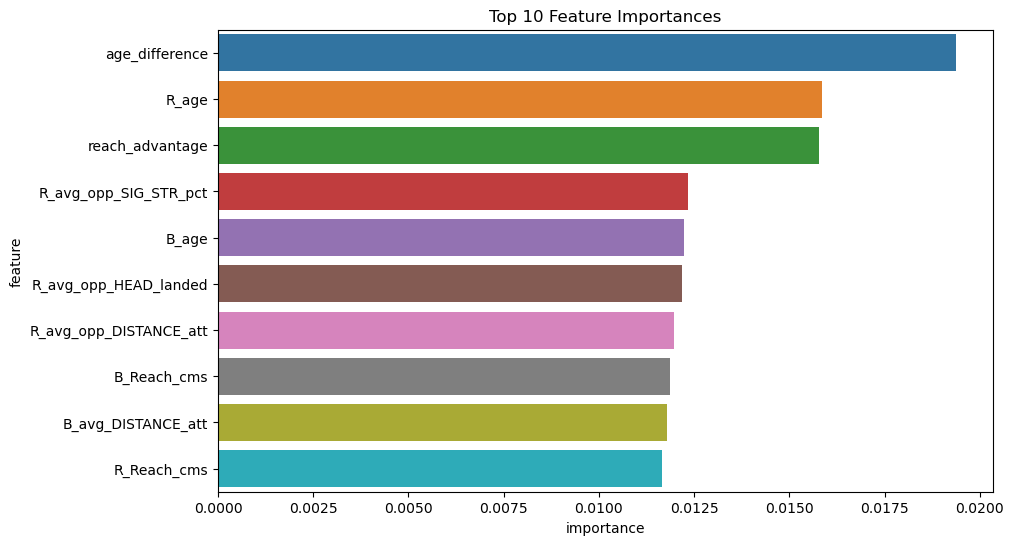

In [67]:
# examining feature

# Initialize the model with class_weight='balanced'
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  

# Fit the model
rf_classifier.fit(X_train_scaled, y_train)  

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


In [68]:
#XG BOOST
print(y_train.value_counts())


Winner
Red     2783
Blue    1348
Name: count, dtype: int64


In [69]:
positive_count = sum(y_train == 1)
negative_count = sum(y_train == 0)
scale_pos_weight = negative_count / positive_count if positive_count > 0 else 1

In [70]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,
                    eval_metric='logloss',
                    use_label_encoder=False)

In [71]:
# Map class labels to binary
mapping = {'Blue': 0, 'Red': 1}
y_train_binary = y_train.map(mapping)
y_test_binary = y_test.map(mapping)

# Calculate scale_pos_weight
positive_count = sum(y_train_binary == 1)
negative_count = sum(y_train_binary == 0)
scale_pos_weight = negative_count / positive_count

# Initialize the XGBClassifier
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', use_label_encoder=False)

# Fit the model
xgb.fit(X_train_scaled, y_train_binary)

# Predict on the test data
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
report_xgb = classification_report(y_test_binary, y_pred_xgb)

print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")
print(report_xgb)


XGBoost Classifier Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.45      0.42      0.44       575
           1       0.73      0.76      0.74      1196

    accuracy                           0.65      1771
   macro avg       0.59      0.59      0.59      1771
weighted avg       0.64      0.65      0.64      1771



In [72]:
# takes: improvement in the recall for Class 0 ('Blue') compared to the previous Random Forest model, which suggests that XGBoost is better at identifying the minority class.
# The precision for Class 0 ('Blue') is lower, indicating that when the model predicts Class 0, it's correct about 45% of the time.
# The model performs better on Class 1 ('Red'), which is often the case with imbalanced datasets — the majority class has better metrics.
# The macro average F1-score is 0.59, which balances the performance across classes regardless of their support

In [73]:
# !pip show lightgbm


In [74]:
# !pip install lightgbm --ignore-installed


In [75]:
# tried lightGBM classifier(but not working properly) uses the is_unbalance parameter to automatically adjust the model for the imbalanced dataset, which can 
# be considered a form of tuning specific to class imbalance

## PARAMETER TUNING

In [76]:

from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter ranges
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'], 
}

# Initialize the base model
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred_best_rf = best_rf_classifier.predict(X_test_scaled)

# Evaluate the best estimator
best_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_report = classification_report(y_test, y_pred_best_rf)

print(f"Best Random Forest Classifier Accuracy: {best_accuracy:.2f}")
print(best_report)



Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Random Forest Classifier Accuracy: 0.67
              precision    recall  f1-score   support

        Blue       0.50      0.16      0.24       575
         Red       0.70      0.92      0.79      1196

    accuracy                           0.67      1771
   macro avg       0.60      0.54      0.52      1771
weighted avg       0.63      0.67      0.61      1771



In [77]:
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of each tree.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
# max_features: The number of features to consider when looking for the best split.
#  methods to perform hyperparameter tuning, but a common and effective one is grid search with cross-validation

In [78]:

# Define a grid of hyperparameters to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize the classifier
xgb_classifier = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_binary)

# Print out the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Retrieve the best estimator
best_xgb_classifier = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred_best_xgb = best_xgb_classifier.predict(X_test_scaled)

# Evaluate the best estimator
best_xgb_accuracy = accuracy_score(y_test_binary, y_pred_best_xgb)
best_xgb_report = classification_report(y_test_binary, y_pred_best_xgb)

print(f"Best XGBoost Classifier Accuracy: {best_xgb_accuracy:.2f}")
print(best_xgb_report)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  11.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   6.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   7.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   8.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   9.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   7.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  10.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   9.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  10.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  10.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  10.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=No

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.6; total time=   4.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   3.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.7s


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   9.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  10.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  10.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   6.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   7.0s
[CV] END max_depth=N

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   9.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.6; total time=  11.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.6; total time=   4.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=   9.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=  17.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.6; total time=  11.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=  13.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   5.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time= 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.6; total time=   4.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.8; total time=  10.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=  17.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=  19.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; tot

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=   9.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=  13.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=  17.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; tot

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; tot

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=1.0; total time=  20.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=  22.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; tot

Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best XGBoost Classifier Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.45      0.59      0.51       575
           1       0.77      0.65      0.70      1196

    accuracy                           0.63      1771
   macro avg       0.61      0.62      0.61      1771
weighted avg       0.66      0.63      0.64      1771



In [79]:
# Some things to note:

# The hyperparameter grid defined in param_grid is just a starting point
# The scoring parameter 'f1_macro' is used because it calculates metrics globally by counting the total true positives, false negatives, and false positives, which can be better for imbalanced classes.
# n_jobs=-1 enables the use of all cores on your machine for parallel computation, which speeds up the search.
# verbose=2 will provide updates on the progress during the grid search, which can be quite helpful during a long-running process.

## MODEL STACKING

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features = pre_data.drop('Winner', axis=1)
target = pre_data['Winner']

# Encoding the target variables to 0 and 1
#  encoding 'Blue' as 0 and 'Red' as 1.

target_encoded = target.map({'Blue': 0, 'Red': 1})

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

# Calculate scale_pos_weight for XGBClassifier
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base learners
level0 = list()
level0.append(('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')))
level0.append(('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')))

# Initialize meta learner
level1 = LogisticRegression()

# Initialize the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Fit the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and report
print(f"Stacking Classifier Accuracy: {accuracy:.2f}")
print(report)




Stacking Classifier Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.50      0.21      0.29       575
           1       0.70      0.90      0.79      1196

    accuracy                           0.68      1771
   macro avg       0.60      0.55      0.54      1771
weighted avg       0.64      0.68      0.63      1771



In [88]:
# After fitting GridSearchCV
print("Best score from grid search: {:.2f}".format(grid_search.best_score_))
print("Best parameters:", grid_search.best_params_)


Best score from grid search: 0.62
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [86]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

# After making predictions


accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1_macro:.2f}")
print(f"F1 Score (Weighted): {f1_weighted:.2f}")


Accuracy: 0.68
F1 Score (Macro): 0.54
F1 Score (Weighted): 0.63


## MODEL SELECTION

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


label_encoder = LabelEncoder()

label_encoder.fit(pre_data['Winner'])

# Transform the 'Winner' column
pre_data['Winner_Encoded'] = label_encoder.transform(pre_data['Winner'])

# Prepare features and target
features = pre_data.drop(['Winner', 'Winner_Encoded'], axis=1)
target_encoded = pre_data['Winner_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the base learners
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
xgb = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')

# Fit the base learners
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

# Define meta learner model
lr = LogisticRegression()

# Initialize the stacking ensemble
stacked_model = StackingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb)
], final_estimator=lr, cv=5)

# Fit the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Evaluate each model
models = [
    ('Random Forest', rf),  # Direct reference to the fitted RandomForest
    ('XGBoost', xgb),       # Direct reference to the fitted XGBoost
    ('Stacked Model', stacked_model)
]

# Evaluate each model
for name, model in models:
    y_pred = model.predict(X_test_scaled)
    # Convert the numeric predictions back to original labels for evaluation
    y_pred_label = label_encoder.inverse_transform(y_pred)
    # Convert the numeric test labels back to original string labels for evaluation
    y_test_label = label_encoder.inverse_transform(y_test)
    
    accuracy = accuracy_score(y_test_label, y_pred_label)
    f1 = f1_score(y_test_label, y_pred_label, average='macro')
    print(f"{name} Accuracy: {accuracy:.2f} F1 Score (Macro): {f1:.2f}")


Random Forest Accuracy: 0.68 F1 Score (Macro): 0.53
XGBoost Accuracy: 0.66 F1 Score (Macro): 0.57
Stacked Model Accuracy: 0.68 F1 Score (Macro): 0.54


## MODEL INTERPRETATION

In [90]:
# Feature Importances for Random Forest and XGBoost:


import numpy as np

# For Random Forest
importances_rf = best_rf_classifier.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# For XGBoost
importances_xgb = best_xgb_classifier.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]


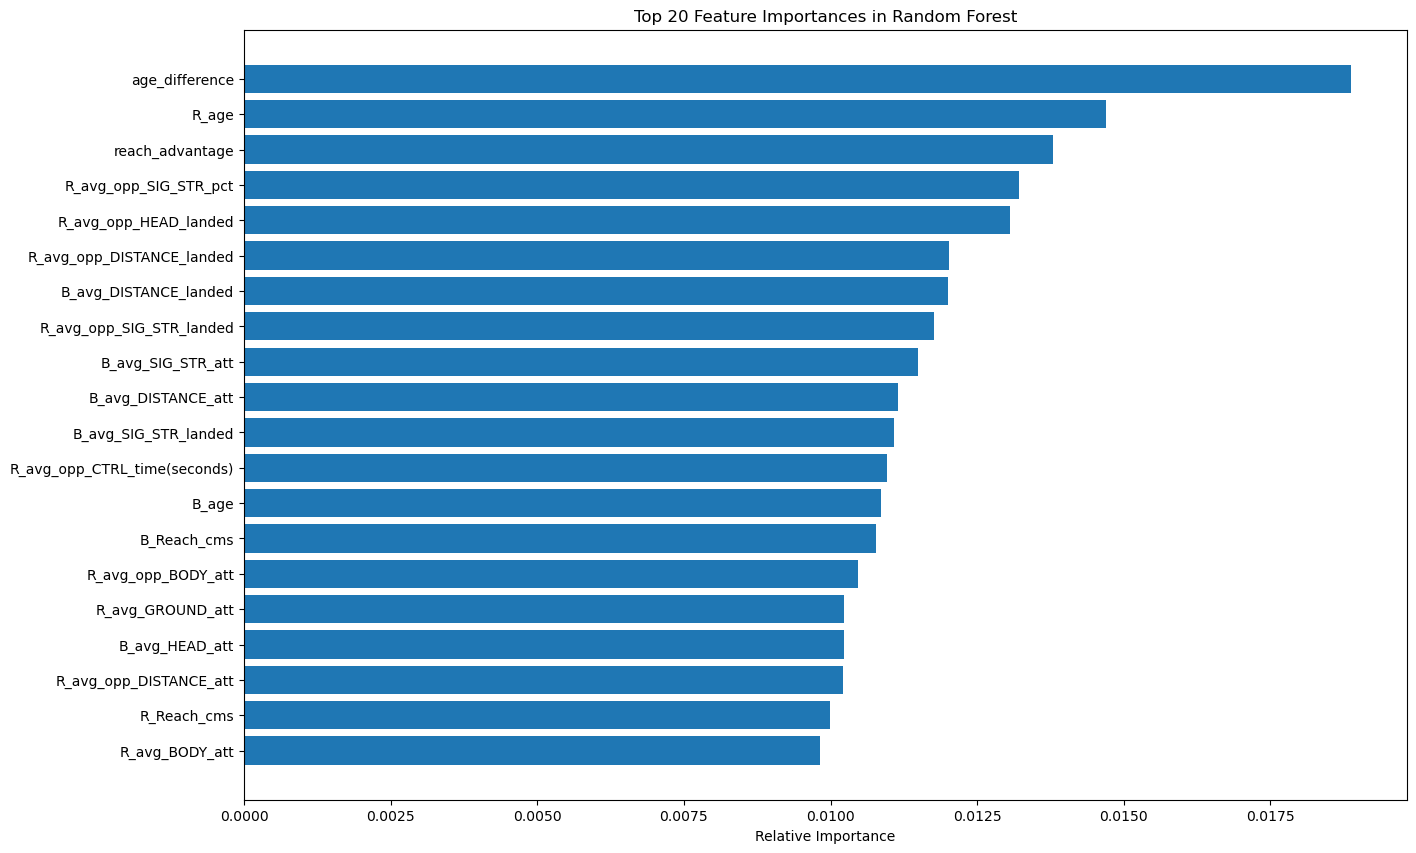

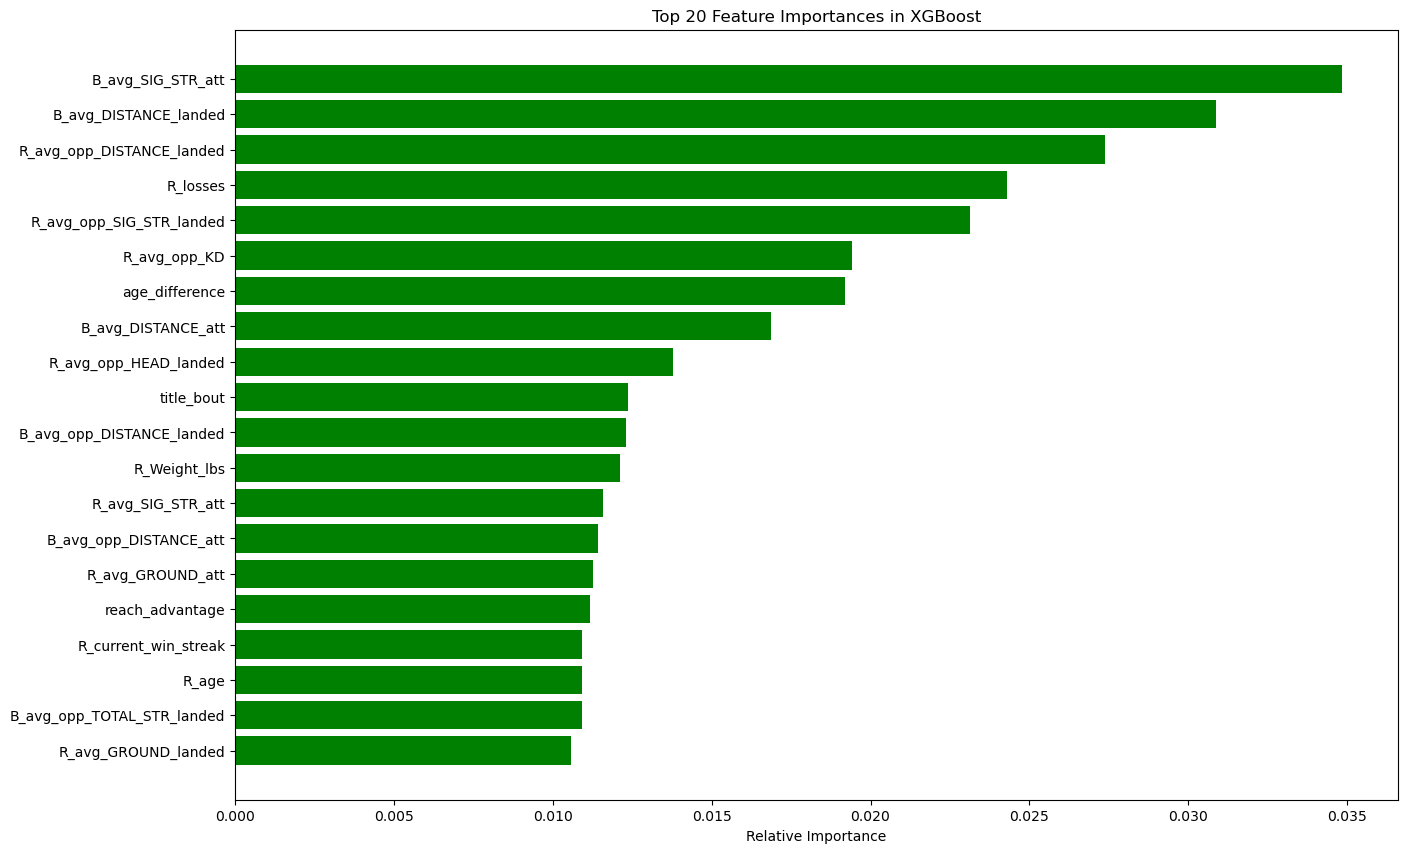

In [91]:
# Number of top features to select
top_n = 20

# Plot Random Forest Feature Importances for top n
indices_rf = np.argsort(importances_rf)[-top_n:]
plt.figure(figsize=(15, 10))
plt.title('Top {} Feature Importances in Random Forest'.format(top_n))
plt.barh(range(top_n), importances_rf[indices_rf], align='center')
plt.yticks(range(top_n), [X_train.columns[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost Feature Importances for top n
indices_xgb = np.argsort(importances_xgb)[-top_n:]

# Plot XGBoost Feature Importances for top n
plt.figure(figsize=(15, 10))
plt.title('Top {} Feature Importances in XGBoost'.format(top_n))
plt.barh(range(top_n), importances_xgb[indices_xgb], color='g', align='center')
plt.yticks(range(top_n), [X_train.columns[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()

In [92]:

# Actionable Insights:
# Identifying which features are most important can help focus on collecting more accurate or detailed data for these features in the future.
# knowing which factors most often lead to a victory can inform coaching strategies

In [99]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/59/11/63de36e6933b03490fdfe5cbc9b5a68870a1281d8e705a23b33076dc82fb/scikit_learn-1.4.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scikit_learn-1.4.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
Note: you may need to restart the kernel to use updated packages.


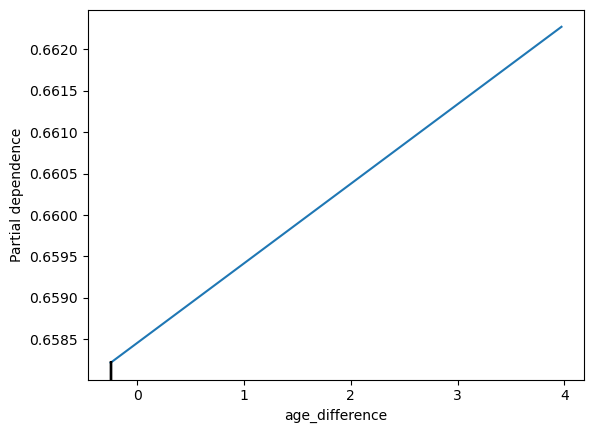

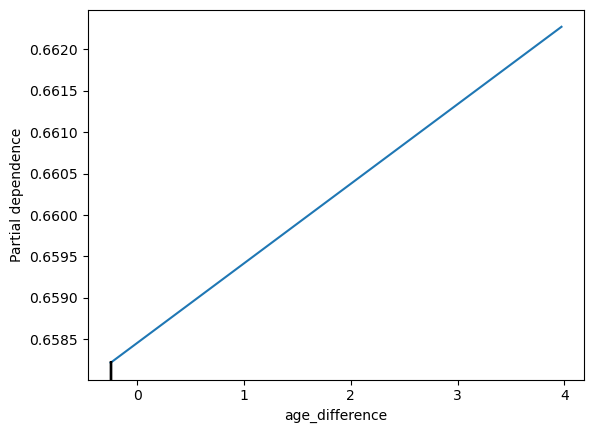

In [107]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


display = PartialDependenceDisplay.from_estimator(
    best_rf_classifier, 
    X_train_scaled, 
    features=[0],  #'age_difference' is the first feature in scaled training data
    grid_resolution=50,  # number of grid points to use for numeric features
    feature_names=['age_difference']  
)

display.plot()
plt.show()



In [100]:
pip install numpy==1.24


Note: you may need to restart the kernel to use updated packages.


In [139]:
import shap

# Create a SHAP explainer and calculate SHAP values for the Random Forest
explainer_rf = shap.TreeExplainer(best_rf_classifier)
shap_values_rf = explainer_rf.shap_values(X_test_scaled)

# Choose the index for the class of interest (0 or 1 for binary classification)
class_index = 1  # or 0 for the other class

# Extract the SHAP values for the first instance of the chosen class
shap_values_instance = shap_values_rf[class_index][0]  # This should be a 1D array

# Extract the feature values for the first instance
# This will also be a 1D array of the feature values for the instance
features_instance = X_test_scaled.iloc[0] if hasattr(X_test_scaled, 'iloc') else X_test_scaled[0]

# Check the dimensions to ensure they match
print("SHAP values shape:", shap_values_instance.shape)
print("Features shape:", features_instance.shape)

# Proceed with plotting only if the dimensions match
if len(shap_values_instance) == len(features_instance):
    # Plot the SHAP values for the first instance
    shap.initjs()
    shap.force_plot(explainer_rf.expected_value[class_index], shap_values_instance, features_instance)
else:
    print("Mismatch in number of SHAP values and features. Ensure you have selected SHAP values for a single instance and class.")


SHAP values shape: (2,)
Features shape: (167,)
Mismatch in number of SHAP values and features. Ensure you have selected SHAP values for a single instance and class.


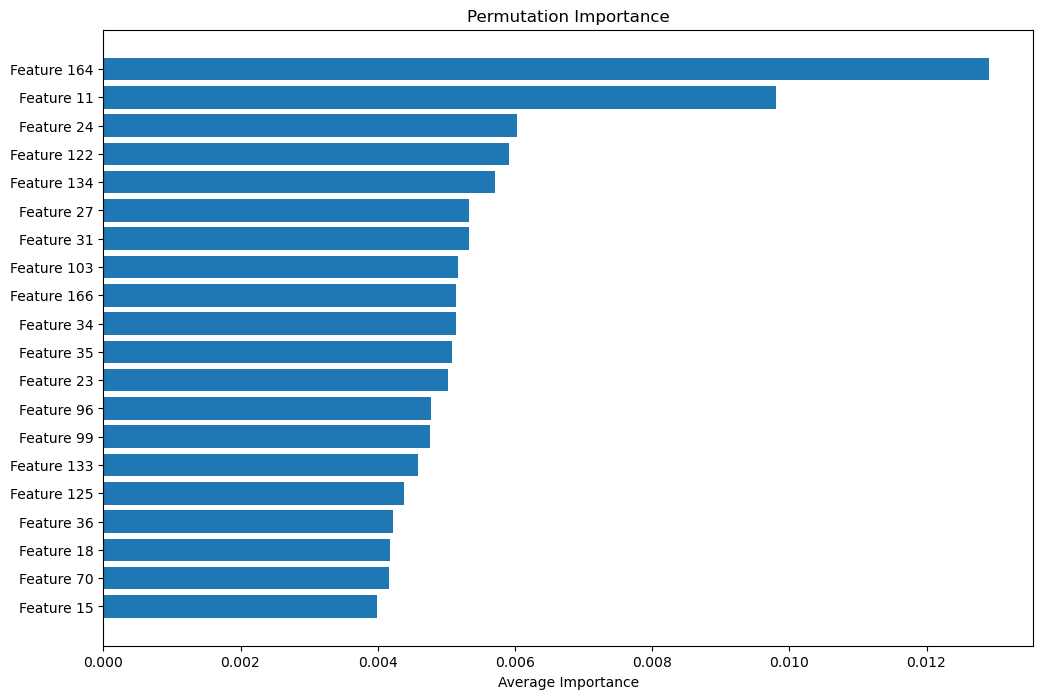

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np



# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Calculate permutation importance on the trained classifier
perm_importance = permutation_importance(rf_classifier, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Retrieve the importances and the corresponding feature names
importances = perm_importance.importances_mean
feature_names = np.array([f"Feature {i}" for i in range(X_test_scaled.shape[1])])  

# Sort the feature importances in descending order and plot the top 20
sorted_idx = np.argsort(importances)[::-1]
top_idx = sorted_idx[:20]

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_idx)), importances[top_idx], align='center')
plt.yticks(range(len(top_idx)), feature_names[top_idx])
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.xlabel('Average Importance')
plt.title('Permutation Importance')
plt.show()



Columns in pre_data before processing: ['Winner', 'title_bout', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg

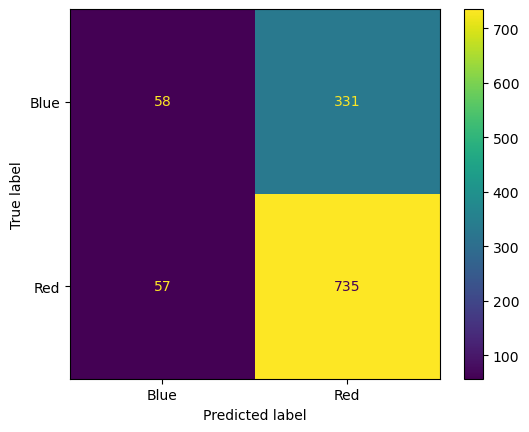

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Columns in pre_data before processing:", pre_data.columns.tolist())

# one-hot encode them
categorical_columns = ['Referee', 'location', 'weight_class']
columns_to_encode = [col for col in categorical_columns if col in pre_data.columns]

if columns_to_encode:
    pre_data = pd.get_dummies(pre_data, columns=columns_to_encode)
else:
    print("Columns intended for one-hot encoding are not available in pre_data.")

# 'Winner' needs to be encoded
label_encoder = LabelEncoder()
pre_data['Winner_Encoded'] = label_encoder.fit_transform(pre_data['Winner'])

# Drop 'Winner' if it's no longer needed
pre_data = pre_data.drop(['Winner'], axis=1, errors='ignore')

# Split data into features and target
X = pre_data.drop('Winner_Encoded', axis=1)
y = pre_data['Winner_Encoded']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict and create a confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()





In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Verify the columns presentr DataFrame
print(pre_data.columns)

# Drop the target column to create features
X = pre_data.drop(['Winner_Encoded'], axis=1)
y = pre_data['Winner_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the outputs
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)




Index(['title_bout', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV',
       ...
       'R_Stance_Switch', 'ratio_avg_SIG_STR', 'R_experience', 'B_experience',
       'R_win_streak', 'B_win_streak', 'age_difference', 'weight_advantage',
       'reach_advantage', 'Winner_Encoded'],
      dtype='object', length=168)
Accuracy: 0.6729979466119097
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.19      0.27       632
           1       0.70      0.91      0.79      1316

    accuracy                           0.67      1948
   macro avg       0.59      0.55      0.53      1948
weighted avg       0.63      0.67      0.62      1948



Shape of X_test_scaled: (1771, 167)
Shape of y_test: (1771,)


/Users/irisfabros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


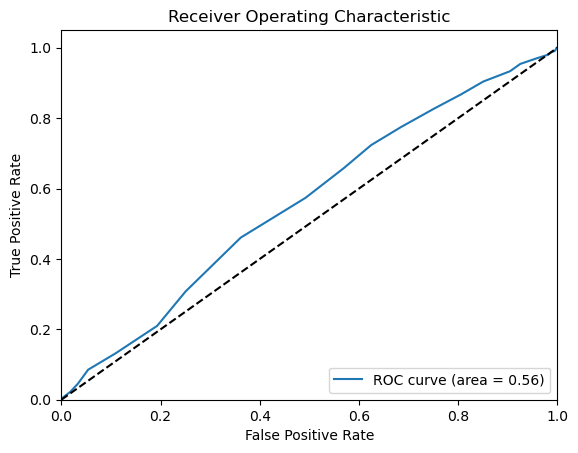

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


X = pre_data.drop('Winner_Encoded', axis=1)
y = pre_data['Winner_Encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# need scaling operation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checkshapes
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)

# model is trained using X_train_scaled and y_train
if hasattr(model, "predict_proba"):
    probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

    # Compute ROC curve and ROC area for the model
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal 45 degree line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("The model does not support probability predictions. Check the model configuration.")



# DEEP LEARNING

In [ ]:
##Tensorfllow/Keras model

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dummy data preparation
# X = features (numpy array)
# y = labels (numpy array, ensure they are encoded as 0 and 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (Neural networks perform better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NameError: name 'X' is not defined

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


2024-05-17 10:46:06.818722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'X_train_scaled' is not defined

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'pre_data' is your DataFrame and is already loaded
print(pre_data.columns)

# Drop the target column to create features and extract the target
X = pre_data.drop('Winner_Encoded', axis=1)
y = pre_data['Winner_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Make predictions (probabilistic and class labels)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model performance
accuracy = np.mean(y_pred.flatten() == y_test)
report = classification_report(y_test, y_pred.flatten())
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal 45 degree line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'pre_data' is not defined